# Unsupervised Learning Presentation

# Imports : 

In [1186]:
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch, SpectralClustering, DBSCAN
from sklearn.decomposition import PCA, MiniBatchDictionaryLearning, DictionaryLearning, NMF, FastICA, FactorAnalysis, LatentDirichletAllocation
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
np.random.seed(0)

# Open Unlabelled file : 

In [1187]:
features_unsupervised = pd.read_csv("features_unsupervised.csv", sep=";")

# Unsupervised Feature Selection

First, we are going to look at the features that have the lowest variance. We will then remove these features from the dataset.

original features shape:
(1000, 66)


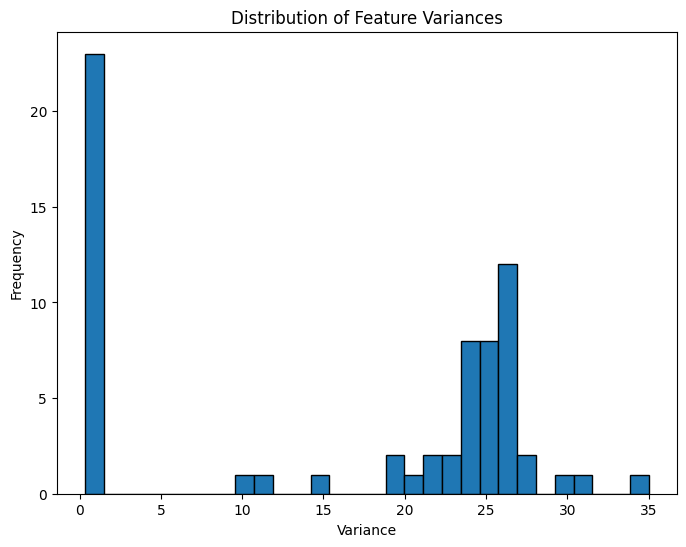

In [1188]:
# Print the shape of the original features
print('original features shape:')
print(features_unsupervised.shape)

# Set the threshold for variance
thr = 0 

# Create a VarianceThreshold object with the specified threshold
selector = VarianceThreshold(threshold=thr)

# Apply the VarianceThreshold transformation to the features
features_unsupervised_new = selector.fit_transform(features_unsupervised)

# Get the variances of the selected features
variances = selector.variances_

# Plot the distribution of feature variances
plt.figure(figsize=(8, 6))
plt.hist(variances, bins=30, edgecolor='black')
plt.title('Distribution of Feature Variances')
plt.xlabel('Variance')
plt.ylabel('Frequency')
plt.show()


We could think that the features with the lowest variance on this chart are to be removed. However, we did not take into account the fact that the features are not normalized. 

Let's do this now : 

## Normalization of features

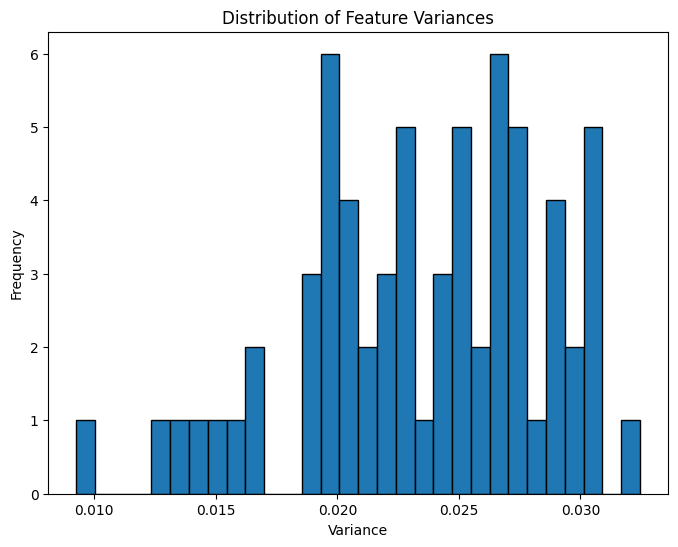

In [1189]:
def normalize_df(df):
    # Initialize the MinMaxScaler, which will transform features by scaling each feature to a given range (default is [0, 1])
    scaler = MinMaxScaler()

    # Fit the scaler to the features_unsupervised DataFrame and transform the data. The result is a normalized version of the original DataFrame
    normalized = scaler.fit_transform(df)

    # Reconstruct the DataFrame with the normalized values, maintaining the original column names and index
    normalized_df = pd.DataFrame(normalized, columns=df.columns, index=df.index)
    return normalized_df

# Reconstruct the DataFrame with the normalized values, maintaining the original column names and index
features_unsupervised_normalized_df = normalize_df(features_unsupervised)

# Set the variance threshold. Features with a variance lower than this threshold will be removed.
thr = 0

# Initialize the VarianceThreshold object with the defined threshold
selector = VarianceThreshold(threshold=thr)

# Fit the selector to the normalized DataFrame and transform the data. The result is a new DataFrame where features with variances lower than the threshold have been removed
features_unsupervised_normalized_new = selector.fit_transform(features_unsupervised_normalized_df)

# Get the variances of the features
variances = selector.variances_

# Plot a histogram of the variances
plt.figure(figsize=(8, 6))
plt.hist(variances, bins=30, edgecolor='black')
plt.title('Distribution of Feature Variances')
plt.xlabel('Variance')
plt.ylabel('Frequency')
plt.show()

Now that we have normalized the features, we can look at the variance of the features again and remove the features with the lowest variance : 

In [1190]:
def remove_features_with_low_variance(df, thr):
    # Initialize VarianceThreshold with the calculated threshold
    selector = VarianceThreshold(threshold=thresh_perc)

    # Fit the selector to the normalized DataFrame and transform the data. The result is a new DataFrame where features with variances lower than the threshold have been removed
    reduced = selector.fit_transform(df)

    # Get the selected features mask, which is a boolean array indicating whether a feature has been selected (True) or not (False)
    selected_features_mask = selector.get_support()

    # Get the selected columns using the selected features mask
    selected_columns = df.columns[selected_features_mask]

    # Reconstruct DataFrame with selected features
    reduced_df = pd.DataFrame(reduced, columns=selected_columns, index=df.index)

    return reduced_df

# Find the threshold to remove the given percentage of features with the lowest variance
perc_toremove = 5
thresh_perc = np.percentile(variances, perc_toremove)
print("Threshold to remove {}% of features: {}".format(perc_toremove, thresh_perc))

# Reconstruct DataFrame with selected features
features_unsupervised_normalized_reduced_df = remove_features_with_low_variance(features_unsupervised_normalized_df, thresh_perc)

# Print the shape of the original features DataFrame
print('Original features shape:')
print(features_unsupervised_normalized_df.shape)

# Print the shape of the selected features DataFrame
print('Selected features shape:')
print(features_unsupervised_normalized_reduced_df.shape)


Threshold to remove 5% of features: 0.014378393647693452
Original features shape:
(1000, 66)
Selected features shape:
(1000, 62)


In [1191]:
def get_list_of_deleted_features(df, reduced_df):
    original_features = df.columns.tolist()
    reduced_features = reduced_df.columns.tolist()
    removed_features_list = [feature for feature in original_features if feature not in reduced_features]
    return removed_features_list

# Get the list of removed features
removed_features_list = get_list_of_deleted_features(features_unsupervised_normalized_df, features_unsupervised_normalized_reduced_df)

# Print the number of removed features and their names
print(f"{len(removed_features_list)} features were removed:")
for feature_name in removed_features_list:
    print(feature_name)

# Print the features with variances greater than the threshold
print(f"\nFeatures with variance greater than {thr} threshold:")
for feature_name in features_unsupervised_normalized_reduced_df.columns:
        print(f"{feature_name}")


4 features were removed:
 distance(rat, cheese_0)
 distance(rat, cheese_1)
 distance(python, cheese_17)
 distance(python, cheese_20)

Features with variance greater than 0 threshold:
 density(rat)
 density(python)
 distance(rat, python)
 density(cheese_0)
 distance(python, cheese_0)
 density(cheese_1)
 distance(python, cheese_1)
 density(cheese_2)
 distance(rat, cheese_2)
 distance(python, cheese_2)
 density(cheese_3)
 distance(rat, cheese_3)
 distance(python, cheese_3)
 density(cheese_4)
 distance(rat, cheese_4)
 distance(python, cheese_4)
 density(cheese_5)
 distance(rat, cheese_5)
 distance(python, cheese_5)
 density(cheese_6)
 distance(rat, cheese_6)
 distance(python, cheese_6)
 density(cheese_7)
 distance(rat, cheese_7)
 distance(python, cheese_7)
 density(cheese_8)
 distance(rat, cheese_8)
 distance(python, cheese_8)
 density(cheese_9)
 distance(rat, cheese_9)
 distance(python, cheese_9)
 density(cheese_10)
 distance(rat, cheese_10)
 distance(python, cheese_10)
 density(cheese_11

# Manual feature selection and feature engineering

In addition to the removal of this features, we will get rid of the distance(rat, python) feature which does not have any major influence on the result of the games 

In [1192]:
columns_to_delete = [' distance(rat, python)', ' density(cheese_0)', ' density(cheese_1)', ' density(cheese_2)', ' density(cheese_3)', ' density(cheese_4)', ' density(cheese_5)', ' density(cheese_6)', ' density(cheese_7)', ' density(cheese_8)', ' density(cheese_9)', ' density(cheese_10)', ' density(cheese_11)', ' density(cheese_12)', ' density(cheese_13)', ' density(cheese_14)', ' density(cheese_15)', ' density(cheese_16)', ' density(cheese_17)', ' density(cheese_18)', ' density(cheese_19)', ' density(cheese_20)', ' distance(rat, cheese_0)', ' distance(rat, cheese_1)', ' distance(rat, cheese_2)', ' distance(rat, cheese_3)', ' distance(rat, cheese_4)', ' distance(rat, cheese_5)', ' distance(rat, cheese_6)', ' distance(rat, cheese_7)', ' distance(rat, cheese_8)', ' distance(rat, cheese_9)', ' distance(rat, cheese_10)', ' distance(rat, cheese_11)', ' distance(rat, cheese_12)', ' distance(rat, cheese_13)', ' distance(rat, cheese_14)', ' distance(rat, cheese_15)', ' distance(rat, cheese_16)', ' distance(rat, cheese_17)', ' distance(rat, cheese_18)', ' distance(rat, cheese_19)', ' distance(rat, cheese_20)', ' distance(python, cheese_0)', ' distance(python, cheese_1)', ' distance(python, cheese_2)', ' distance(python, cheese_3)', ' distance(python, cheese_4)', ' distance(python, cheese_5)', ' distance(python, cheese_6)', ' distance(python, cheese_7)', ' distance(python, cheese_8)', ' distance(python, cheese_9)', ' distance(python, cheese_10)', ' distance(python, cheese_11)', ' distance(python, cheese_12)', ' distance(python, cheese_13)', ' distance(python, cheese_14)', ' distance(python, cheese_15)', ' distance(python, cheese_16)', ' distance(python, cheese_17)', ' distance(python, cheese_18)', ' distance(python, cheese_19)', ' distance(python, cheese_20)']

for col in columns_to_delete:
    if col in features_unsupervised_normalized_reduced_df.columns:
        features_unsupervised_normalized_reduced_df = features_unsupervised_normalized_reduced_df.drop(columns=col)

# Print original features shape
print('Original features shape:')
print(features_unsupervised_normalized_df.shape)

# Print selected features shape
print('Selected features shape:')
print(features_unsupervised_normalized_reduced_df.shape)

Original features shape:
(1000, 66)
Selected features shape:
(1000, 2)


Now, we will do some feature engineering. We will create some new features : 
- sum of distances between python and half plus one of the closest cheeses (The less it is, the closest half of the cheeses are to the python even though a greedy algorithm would not go back to the initial position after eating a cheese. But it is a second indicator related to the density of the cheeses)
- sum of distances between rat and half plus one of the closest cheeses (The less it is, the closest half of the cheeses are to the rat even though a greedy algorithm would not go back to the initial position after eating a cheese. But it is a second indicator related to the density of the cheeses)
- distance between rat and cheese with the highest density (can be a good indicator for the winner. Cause if the rat does not have the best density but is closest to the cheese with the best density, it can win)
- distance between python and cheese with the highest density (can be a good indicator for the winner. Cause if the python does not have the best density but is closest to the cheese with the best density, it can win)

In [1193]:
# Get the names of the previously removed features 
removed_features_names = get_list_of_deleted_features(features_unsupervised, features_unsupervised_normalized_reduced_df) 
print(removed_features_names)

features_unsupervised_new = features_unsupervised.copy()
# Define the number of cheeses
n_cheeses = 21

# Calculate the sum of distances between python and half plus one of the closest cheeses
distances_python_cheeses = features_unsupervised_new.filter(regex='distance\(python, cheese_\d+\)').values
half_plus_one = (n_cheeses + 1) // 2
closest_distances_python = np.partition(distances_python_cheeses, half_plus_one, axis=1)[:, :half_plus_one]
features_unsupervised_new['python_closest_cheeses_sum'] = np.sum(closest_distances_python, axis=1)

# Calculate the sum of distances between rat and half plus one of the closest cheeses
distances_rat_cheeses = features_unsupervised_new.filter(regex='distance\(rat, cheese_\d+\)').values
closest_distances_rat = np.partition(distances_rat_cheeses, half_plus_one, axis=1)[:, :half_plus_one]
features_unsupervised_new['rat_closest_cheeses_sum'] = np.sum(closest_distances_rat, axis=1)

# Calculate the distance between rat and cheese with the highest density
cheese_densities = features_unsupervised_new.filter(regex='density\(cheese_\d+\)').values
cheese_distances_rat = features_unsupervised_new.filter(regex='distance\(rat, cheese_\d+\)').values
max_cheese_density_idx = np.argmax(cheese_densities, axis=1)
features_unsupervised_new['rat_distance_to_max_density_cheese'] = cheese_distances_rat[np.arange(len(max_cheese_density_idx)), max_cheese_density_idx]

# Calculate the distance between python and cheese with the highest density
cheese_distances_python = features_unsupervised_new.filter(regex='distance\(python, cheese_\d+\)').values
features_unsupervised_new['python_distance_to_max_density_cheese'] = cheese_distances_python[np.arange(len(max_cheese_density_idx)), max_cheese_density_idx]

# Remove the previously removed features from the DataFrame 
features_unsupervised_reduced = features_unsupervised_new.drop(columns=removed_features_names)

# Normalize the features
features_unsupervised_reduced_normalized = normalize_df(features_unsupervised_reduced)

[' distance(rat, python)', ' density(cheese_0)', ' distance(rat, cheese_0)', ' distance(python, cheese_0)', ' density(cheese_1)', ' distance(rat, cheese_1)', ' distance(python, cheese_1)', ' density(cheese_2)', ' distance(rat, cheese_2)', ' distance(python, cheese_2)', ' density(cheese_3)', ' distance(rat, cheese_3)', ' distance(python, cheese_3)', ' density(cheese_4)', ' distance(rat, cheese_4)', ' distance(python, cheese_4)', ' density(cheese_5)', ' distance(rat, cheese_5)', ' distance(python, cheese_5)', ' density(cheese_6)', ' distance(rat, cheese_6)', ' distance(python, cheese_6)', ' density(cheese_7)', ' distance(rat, cheese_7)', ' distance(python, cheese_7)', ' density(cheese_8)', ' distance(rat, cheese_8)', ' distance(python, cheese_8)', ' density(cheese_9)', ' distance(rat, cheese_9)', ' distance(python, cheese_9)', ' density(cheese_10)', ' distance(rat, cheese_10)', ' distance(python, cheese_10)', ' density(cheese_11)', ' distance(rat, cheese_11)', ' distance(python, cheese_1

Now that our data is ready, we can start the clustering. First, we will use the Kmeans algorithm. Let's first define a descent number of clusters and then we will use the elbow method to find the best number of clusters.

Calculating Inertia: 0it [00:00, ?it/s]


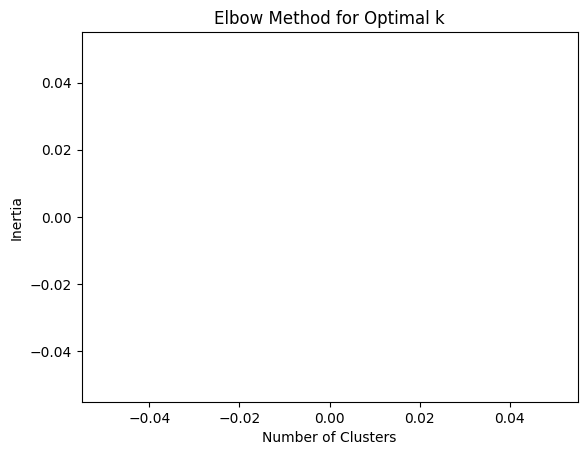

In [1194]:
# Initialize an empty list to store inertias
inertias = []

# Define a range of values for n_clusters (number of clusters)
n_clusters = range(1,1)

import tqdm

# Iterate through the range of n_clusters with tqdm for progress bar
for i in tqdm.tqdm(n_clusters, desc="Calculating Inertia"):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(features_unsupervised_reduced_normalized)
    inertias.append(kmeans.inertia_)
    print(kmeans.inertia_)

# Plot the inertia values against the number of clusters
plt.plot(n_clusters, inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

Looking at the result of the elbow, we can see that 9 clusters seems like a good number of clusters. We will then train the data on a Kmeans model with 9 clusters

In [1195]:
# Number based on your Elbow Method plot
n_clusters = 9 # for example

# Initialize the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10, max_iter=300, tol=1e-04)

# Fit the model to your DataFrame
kmeans.fit(features_unsupervised_reduced_normalized)

# Get the predicted cluster labels
labels = kmeans.labels_

# Add a new column to your DataFrame with the predicted labels
features_unsupervised_reduced_normalized['cluster'] = labels

Once it is done, let's try to plot the clusters in a reduced dimension space using PCA.

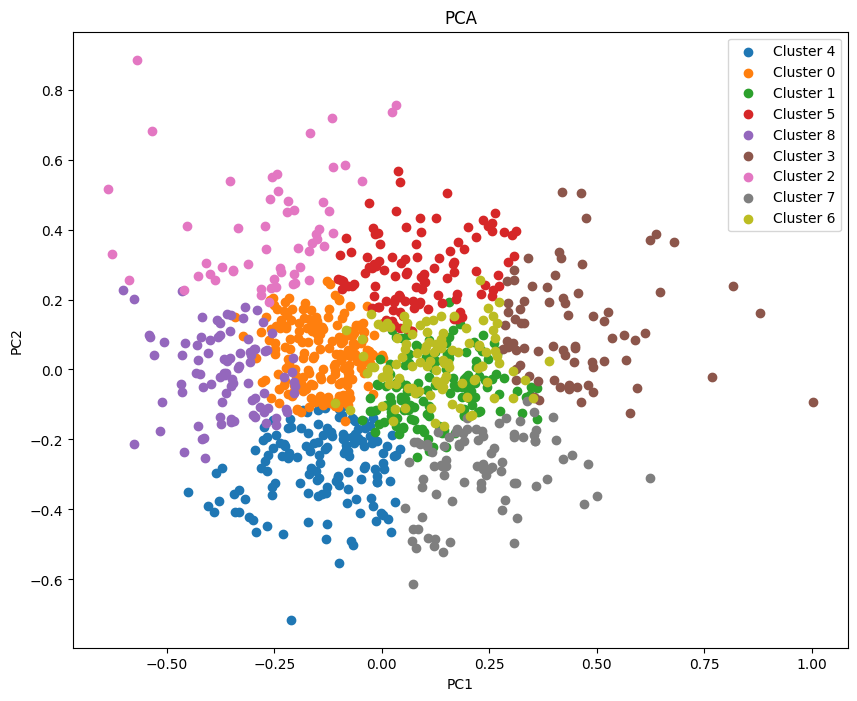

In [1196]:
pca = PCA(n_components=2) 
X_pca = pca.fit_transform(features_unsupervised_reduced_normalized.drop(columns='cluster'))

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

clusters = features_unsupervised_reduced_normalized['cluster']

features_unsupervised_reduced_normalized['PCA1'] = pca_df['PC1']
features_unsupervised_reduced_normalized['PCA2'] = pca_df['PC2']

plt.figure(figsize=(10, 8))

unique_clusters = clusters.unique()
for cluster in unique_clusters:
    cluster_data = pca_df[clusters == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA')
plt.legend()
plt.show()


Here, we can see that except two clusters, the clusters are quite separated from each other. Which is a good sign.

Now, let's try to analyse the components of each principal characteristic of the PCA so we can conclude on the winners for each clusters

In [1197]:
component_weights = pca.components_

variable_weights = []

for i, weights in enumerate(component_weights):
    component_variable_weights = [(feature, weight) for feature, weight in zip(features_unsupervised_reduced_normalized.columns, weights)]
    variable_weights.append(component_variable_weights)

for i, weights in enumerate(variable_weights):
    print(f"Composante Principale {i+1}:")
    for feature, weight in weights:
        print(f"\t{feature}: {weight}")
    print()

Composante Principale 1:
	 density(rat): -0.45698903408815295
	 density(python): 0.28113566077681934
	python_closest_cheeses_sum: -0.2168184582517874
	rat_closest_cheeses_sum: 0.41314321116254854
	rat_distance_to_max_density_cheese: 0.6669178371431392
	python_distance_to_max_density_cheese: -0.22281562937705165

Composante Principale 2:
	 density(rat): -0.2002816175019716
	 density(python): -0.5570872698295612
	python_closest_cheeses_sum: 0.46372542129280864
	rat_closest_cheeses_sum: 0.1794846211543
	rat_distance_to_max_density_cheese: 0.3201079202014319
	python_distance_to_max_density_cheese: 0.5475545373064296



Now that we have the weights of the different principal components of the PCA, we can set some rules to classify each point of the dataset in a cluster. 

To do this, we will assign points based on the coordinates of the points in the PCA space. Once it is done, we will take the mean of point of each cluster and based on this, we will predict the winner of the game.


To assign points, we will use the following subjective rules : 

- The PCA1 components are the most relevant because the features with the positive weights are all in favor of the python and the features with the negative weights are all in favor of the rat.
    - So, if the PCA1 coordinate is below -0.10 (respectively above 0.10), we will assign -2 points (respectively 2 points) to the point. 
    - If the PCA1 coordinate is between -0.10 and 0.10, we will assign -1 point to the point if the coordinate is negative and 1 point if it is positive.
- The PCA2 components are less relevant because both positive and negative values can be in favor of the python or the rat. So, in order to deal with this, we will consider the PCA2 weights one by one. 
    - If the sum of the first, fourth and sixth weights is greater than the sum of the second, third and fifth weights, we will assign 1 point to the point
    - If the sum of the first, fourth and sixth weights is less than the sum of the second, third and fifth weights, we will assign -1 point to the point

Finally, we will consider that the rat wins if the sum of the points is negative and the python wins if the sum of the points is positive. If the sum of the points is equal to 0, we will consider that it is a draw. 

In [1198]:
# Function to assign points based on PCA coordinates
def assign_points(row, component_weights):
    points = 0
    
    # Rule 1: PCA1 components
    if row['PCA1'] < -0.05:
        points -= 2
    elif row['PCA1'] > 0.05:
        points += 2
    elif -0.05 <= row['PCA1'] <= 0.05:
        if row['PCA1'] < 0:
            points -= 1
        elif row['PCA1'] > 0:
            points += 1
    
    # Rule 2: PCA2 components
    sum_1_4_6 = sum([row[' density(rat)'], row['rat_closest_cheeses_sum'], row['rat_distance_to_max_density_cheese']])
    sum_2_3_5 = sum([row[' density(python)'], row['python_closest_cheeses_sum'], row['python_distance_to_max_density_cheese']])
    if sum_1_4_6 > sum_2_3_5:
        points += 1
    elif sum_1_4_6 < sum_2_3_5:
        points -= 1

    if points < 0:
        return -1
    elif points > 0:
        return 1
    else:
        return 0



In [1199]:
features_unsupervised_reduced_normalized['winner_kmeans'] = features_unsupervised_reduced_normalized.apply(lambda row: assign_points(row, component_weights), axis=1)
cluster_2_data = features_unsupervised_reduced_normalized.loc[features_unsupervised_reduced_normalized['cluster'] == 2]

Now, let's try to give a winner to rows independently : 

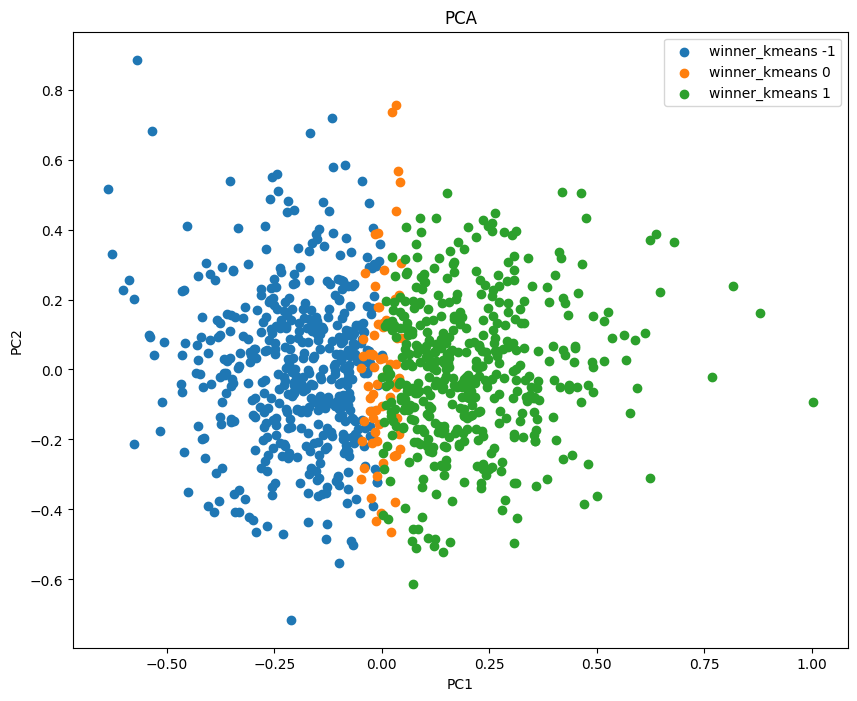

In [1200]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


pca = PCA(n_components=2) 
X_pca = pca.fit_transform(features_unsupervised_reduced_normalized.drop(columns=['cluster', 'PCA1', 'PCA2', 'winner_kmeans']))

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

winners = features_unsupervised_reduced_normalized['winner_kmeans']

features_unsupervised_reduced_normalized['PCA1'] = pca_df['PC1']
features_unsupervised_reduced_normalized['PCA2'] = pca_df['PC2']

plt.figure(figsize=(10, 8))

unique_winners = winners.unique()
for winner_kmeans in unique_winners:
    winner_kmeans_data = pca_df[winners == winner_kmeans]
    plt.scatter(winner_kmeans_data['PC1'], winner_kmeans_data['PC2'], label=f'winner_kmeans {winner_kmeans}')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA')
plt.legend()
plt.show()

This is quite explicit. however, we actually we did not classify each values according to its cluster. Let's do this. To do that, we will only keep the winner that appears the most. If the value that appears the most does not represent more than 70% of the values of the cluster, then it will be a draw prediction. 

In [1201]:
cluster_sums = {}

for cluster in features_unsupervised_reduced_normalized['cluster'].unique():
    cluster_data = features_unsupervised_reduced_normalized[features_unsupervised_reduced_normalized['cluster'] == cluster]

    cluster_sum = cluster_data['winner_kmeans'].sum()

    cluster_sums[cluster] = cluster_sum
for index, row in features_unsupervised_reduced_normalized.iterrows():
    cluster_num = row['cluster']
    number_of_values_in_cluster = len(features_unsupervised_reduced_normalized[features_unsupervised_reduced_normalized['cluster'] == cluster_num])
    cluster_sum = cluster_sums[row['cluster']]
    quota = 70
    value = number_of_values_in_cluster * quota/100
    if cluster_sum < -value:
        features_unsupervised_reduced_normalized.at[index, 'winner_kmeans'] = -1
    elif cluster_sum > +value:
        features_unsupervised_reduced_normalized.at[index, 'winner_kmeans'] = 1
    else:
        features_unsupervised_reduced_normalized.at[index, 'winner_kmeans'] = 0


Now, let's print the proportion of each type of prediction

In [1202]:
winner_kmeans = features_unsupervised_reduced_normalized['winner_kmeans']

def give_proportion(vector):
    value_counts = vector.value_counts()
    
    total_count = len(vector)
    
    for value, count in value_counts.items():
        proportion = (count / total_count) * 100
        print(f"Valeur : {value}, Pourcentage : {proportion:.2f}%")

give_proportion(winner_kmeans)    

Valeur : -1, Pourcentage : 48.20%
Valeur : 1, Pourcentage : 41.00%
Valeur : 0, Pourcentage : 10.80%


Now let's plot again the pca scatter plot so that we see where the python wins, the rat wins and when it is a draw

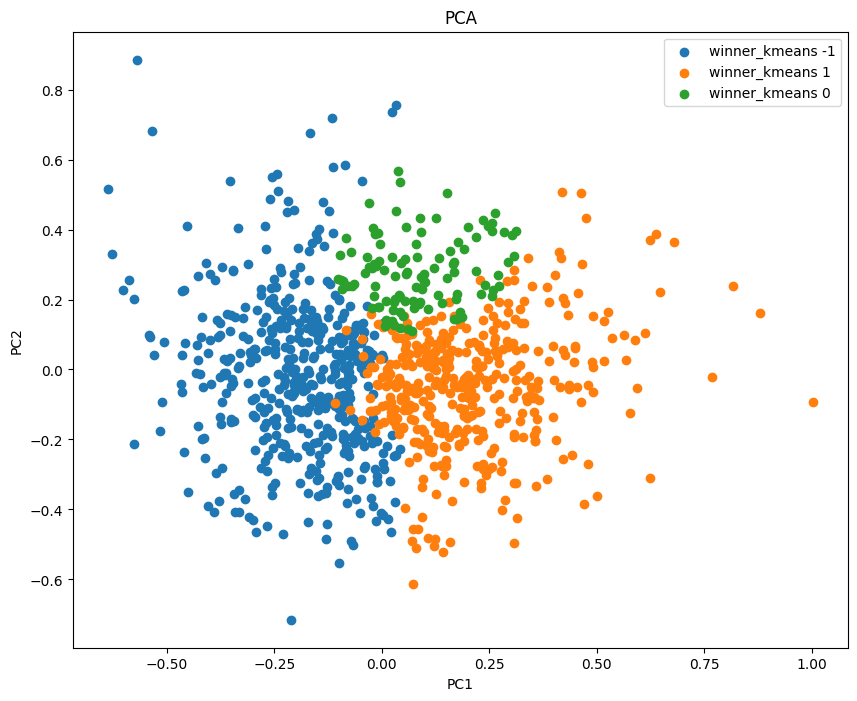

In [1203]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


pca = PCA(n_components=2)  
X_pca = pca.fit_transform(features_unsupervised_reduced_normalized.drop(columns=['cluster', 'PCA1', 'PCA2', 'winner_kmeans']))

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

winners = features_unsupervised_reduced_normalized['winner_kmeans']

features_unsupervised_reduced_normalized['PCA1'] = pca_df['PC1']
features_unsupervised_reduced_normalized['PCA2'] = pca_df['PC2']

plt.figure(figsize=(10, 8))

unique_winners = winners.unique()
for winner_kmeans in unique_winners:
    winner_kmeans_data = pca_df[winners == winner_kmeans]
    plt.scatter(winner_kmeans_data['PC1'], winner_kmeans_data['PC2'], label=f'winner_kmeans {winner_kmeans}')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA')
plt.legend()
plt.show()


Now, let's save our predictions

In [1211]:
# Enregistrer uniquement la colonne 'labels'
np.savez_compressed('labels_binome10.npz', labels=features_unsupervised_reduced_normalized['winner_kmeans'].to_numpy())

import numpy as np

# Charger le fichier NPZ
data = np.load('labels_binome10.npz')

# Vérifier les clés du fichier
print(data.keys())

# Accéder aux valeurs de la clé 'labels'
labels = data['labels']
print(labels.shape)
# Afficher les premières valeurs pour vérification
print(labels[:100])  # Afficher les 10 premières valeurs, par exemple


KeysView(<numpy.lib.npyio.NpzFile object at 0x000001CCC216A510>)
(1000,)
[-1 -1 -1 -1 -1 -1 -1 -1 -1  1  0 -1 -1 -1 -1  1  1  0 -1  1 -1 -1  1 -1
 -1  1  1  1 -1  1  1 -1  1  1 -1  0  1  1  1 -1  1 -1  0 -1 -1 -1  0 -1
  1 -1 -1  1  1 -1 -1  1 -1  1  1 -1  1  1 -1 -1  0 -1  1 -1 -1  0 -1  1
 -1 -1  1 -1 -1 -1  1 -1 -1 -1  1 -1  1  1  1 -1 -1 -1  1  0 -1 -1  1  0
  1  1  1 -1]
